Let's import the necessary things

In [31]:
import bt
import pandas as pd

from interpreter import BTInterpreter
from datetime import date, timedelta

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Let's create a simple buy and hold strategy with one asset

In [32]:
node: dict = {
    'id': 'df876984-3be8-40c9-8847-e3b3c6af3cdc',
    'node-type': 'asset',
    'ticker': 'QQQ'
}

subject = BTInterpreter(node, date.today() - timedelta(weeks=4), date.today())
strategy: bt.Strategy = subject.traverse()
backtest: bt.Backtest = subject.build_backtest(strategy)
result: bt.backtest.Result = bt.run(backtest)



2023-05-22 00:00:00: df876984-3be8-40c9-8847-e3b3c6af3cdc -> Value:1000000, Price:100.0000
Selected: ['QQQ']
Weights: 
{'QQQ': 1.0}

2023-05-23 00:00:00: df876984-3be8-40c9-8847-e3b3c6af3cdc -> Value:987324, Price:98.7324
Selected: ['QQQ']
Weights: 
{'QQQ': 1.0}

2023-05-24 00:00:00: df876984-3be8-40c9-8847-e3b3c6af3cdc -> Value:982259, Price:98.2259
Selected: ['QQQ']
Weights: 
{'QQQ': 1.0}

2023-05-25 00:00:00: df876984-3be8-40c9-8847-e3b3c6af3cdc -> Value:1006160, Price:100.6160
Selected: ['QQQ']
Weights: 
{'QQQ': 1.0}

2023-05-26 00:00:00: df876984-3be8-40c9-8847-e3b3c6af3cdc -> Value:1031868, Price:103.1868
Selected: ['QQQ']
Weights: 
{'QQQ': 1.0}

2023-05-30 00:00:00: df876984-3be8-40c9-8847-e3b3c6af3cdc -> Value:1036548, Price:103.6548
Selected: ['QQQ']
Weights: 
{'QQQ': 1.0}

2023-05-31 00:00:00: df876984-3be8-40c9-8847-e3b3c6af3cdc -> Value:1030654, Price:103.0654
Selected: ['QQQ']
Weights: 
{'QQQ': 1.0}

2023-06-01 00:00:00: df876984-3be8-40c9-8847-e3b3c6af3cdc -> Value:10425

## Show stats, transactions, weights and security weights of the buy and hold strategy

In [33]:
result.stats

,df876984-3be8-40c9-8847-e3b3c6af3cdc
start,2023-05-21 00:00:00
end,2023-06-16 00:00:00
rf,0.0
total_return,0.089711
cagr,2.343118
max_drawdown,-0.017741
calmar,132.074753
mtd,0.057301
three_month,NaN
six_month,NaN


In [34]:
result.get_transactions()

,,price,quantity
Date,Security,,
2023-05-22,QQQ,337.640015,2961.734263


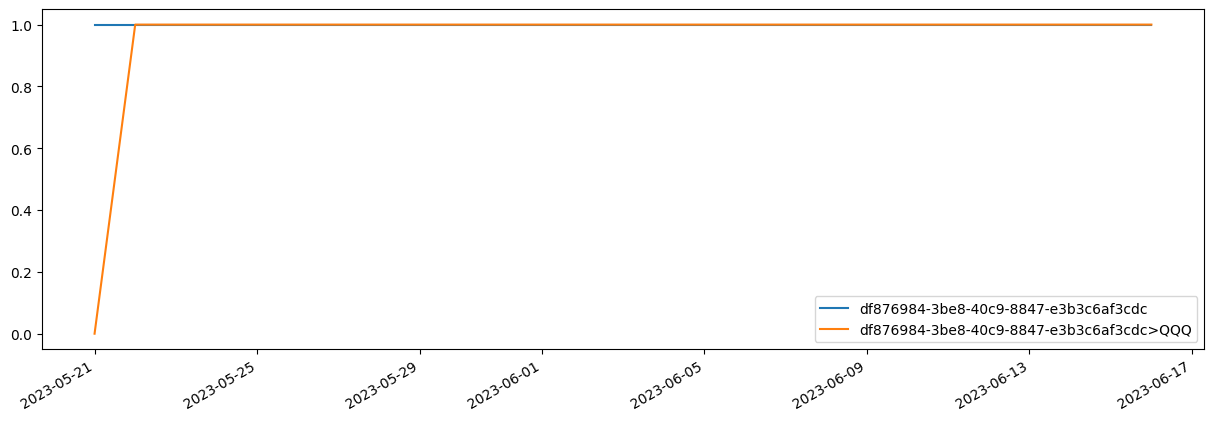

In [35]:
result.plot_weights()

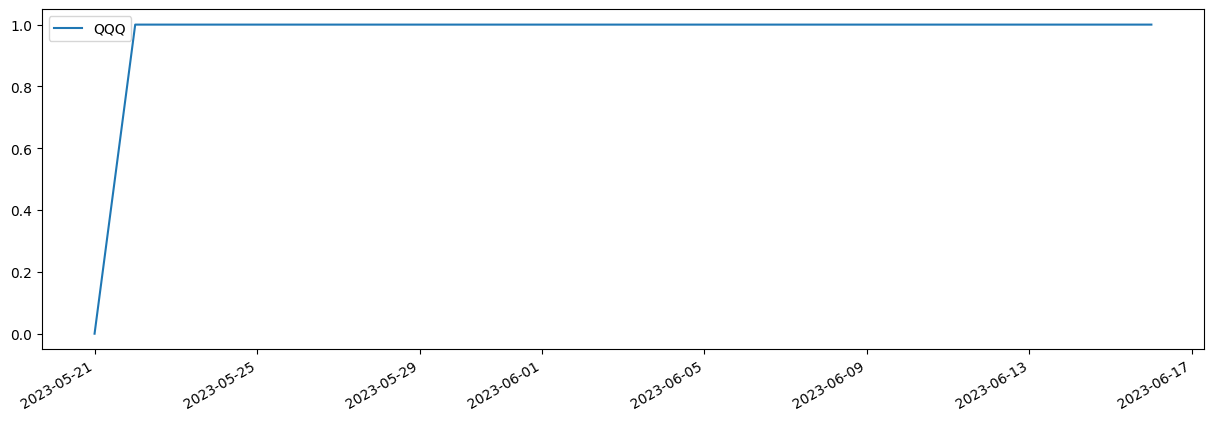

In [36]:
result.plot_security_weights()

Conclusion: Works like desired

## Show stats, transactions, weights and security weights of a first level composite strategy

In [37]:
node: dict = {
    'id': '5fc986bf-d7c8-4582-bc27-f1ede76bdc29',
    'node-type': 'group',
    'children': [
        {
            'id': 'df876984-3be8-40c9-8847-e3b3c6af3cdc',
            'node-type': 'asset',
            'ticker': 'QQQ'
        },
        {
            'id': '742dc790-d0f7-472d-bd3e-405e411c0b2c',
            'node-type': 'asset',
            'ticker': 'SPY'
        }
    ]
}

subject = BTInterpreter(node, date.today() - timedelta(weeks=4), date.today())
strategy: bt.Strategy = subject.traverse()
backtest: bt.Backtest = subject.build_backtest(strategy)
result: bt.backtest.Result = bt.run(backtest)


2023-05-22 00:00:00: df876984-3be8-40c9-8847-e3b3c6af3cdc -> Value:1000000, Price:100.0000
Selected: ['QQQ']
Weights: 
{'QQQ': 1.0}

2023-05-22 00:00:00: 742dc790-d0f7-472d-bd3e-405e411c0b2c -> Value:1000000, Price:100.0000
Selected: ['SPY']
Weights: 
{'SPY': 1.0}

2023-05-22 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29 -> Value:1000000, Price:100.0000
Selected: ['df876984-3be8-40c9-8847-e3b3c6af3cdc', '742dc790-d0f7-472d-bd3e-405e411c0b2c']
Weights: 
Series([], dtype: float64)

2023-05-22 00:00:00: df876984-3be8-40c9-8847-e3b3c6af3cdc -> Value:0, Price:100.0000
Selected: ['QQQ']
Weights: 
{'QQQ': 1.0}

2023-05-22 00:00:00: 742dc790-d0f7-472d-bd3e-405e411c0b2c -> Value:0, Price:100.0000
Selected: ['SPY']
Weights: 
{'SPY': 1.0}

2023-05-23 00:00:00: df876984-3be8-40c9-8847-e3b3c6af3cdc -> Value:987324, Price:98.7324
Selected: ['QQQ']
Weights: 
{'QQQ': 1.0}

2023-05-23 00:00:00: 742dc790-d0f7-472d-bd3e-405e411c0b2c -> Value:988777, Price:98.8777
Selected: ['SPY']
Weights: 
{'SPY': 1.0

In [38]:
result.stats

,5fc986bf-d7c8-4582-bc27-f1ede76bdc29
start,2023-05-21 00:00:00
end,2023-06-16 00:00:00
rf,0.0
total_return,0.08065
cagr,1.973093
max_drawdown,-0.009038
calmar,218.311105
mtd,0.055863
three_month,NaN
six_month,NaN


In [39]:
result.get_transactions()

price     quantity
Date       Security                         
2023-05-23 QQQ       333.359985  1408.661845
           SPY       412.557526  1285.659514
2023-05-24 QQQ       331.649994     4.310999
           SPY       409.568604    -3.490850
2023-05-25 QQQ       339.720001  -362.852440
           SPY       413.115448   298.386884
2023-05-26 QQQ       348.399994    37.786637
           SPY       418.465546   -31.459852
2023-05-30 QQQ       349.980011    -3.618882
           SPY       418.624969     3.025468
2023-05-31 QQQ       347.989990    -6.200039
           SPY       416.303619     5.182639
2023-06-01 QQQ       352.010010    46.050883
           SPY       420.258911   -38.572345
2023-06-02 QQQ       354.649994    97.456546
           SPY       426.336334   -81.069711
2023-06-05 QQQ       354.899994     1.386115
           SPY       425.519379    -1.156075
2023-06-06 QQQ       354.839996    -4.544678
           SPY       426.445923     3.781567
2023-06-07 QQQ       348.820007   -68.971841
           SPY       424.971375    56.612656
2023-06-08 QQQ       353.149994   -11.431199
           SPY       427.541870     9.442181
2023-06-09 QQQ       354.500000    -1.424316
           SPY       428.308990     1.178869
2023-06-12 QQQ       360.489990   -12.479143
           SPY       432.194550    10.408752
2023-06-13 QQQ       363.260010     4.723280
           SPY       435.043976    -3.943920
2023-06-14 QQQ       365.899994    -4.416778
           SPY       435.562042     3.710376
2023-06-15 QQQ       370.260010    29.134923
           SPY       440.962006   -24.463551

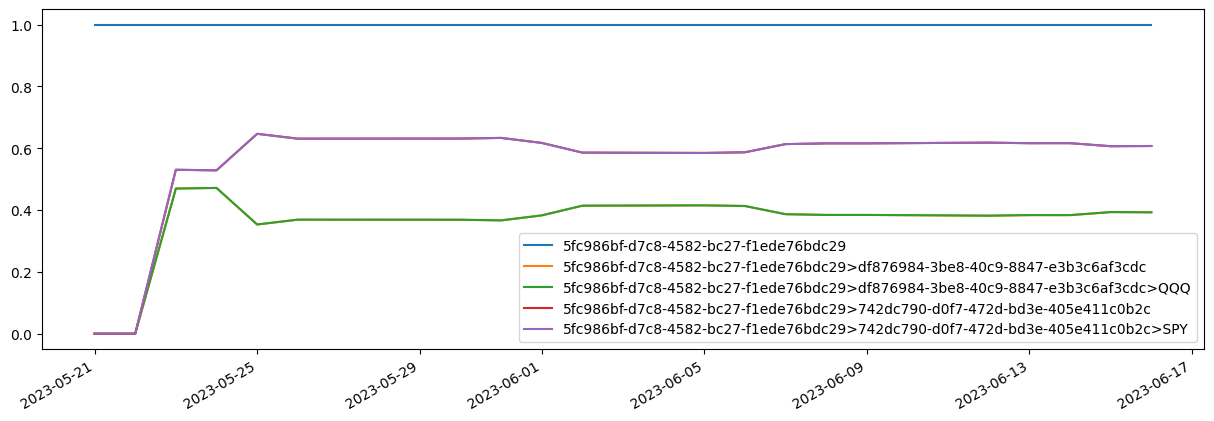

In [40]:
result.plot_weights()

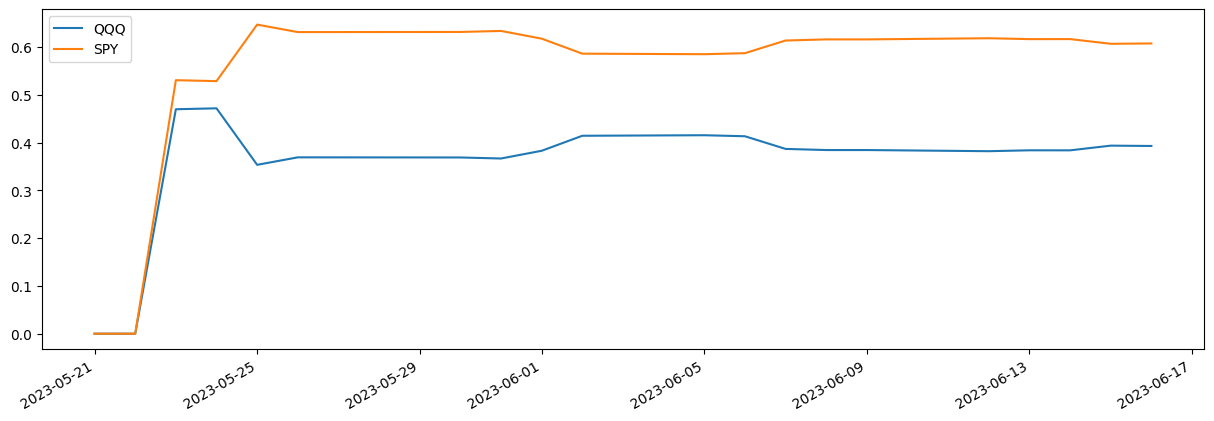

In [41]:
result.plot_security_weights()

Conclusion: Works like desired

## Show stats, transactions, weights and security weights of a second level composite strategy

In [42]:
node: dict = {
    'id': 'c20d0968-2dfa-4ff7-8dfc-4c3d0df36dd4',
    'node-type': 'group',
    'children': [
        {
            'id': '5fc986bf-d7c8-4582-bc27-f1ede76bdc29 ',
            'node-type': 'group',
            'children': [
                {
                    'id': 'df876984-3be8-40c9-8847-e3b3c6af3cdc',
                    'node-type': 'asset',
                    'ticker': 'QQQ'
                },
                {
                    'id': '742dc790-d0f7-472d-bd3e-405e411c0b2c',
                    'node-type': 'asset',
                    'ticker': 'SPY'
                }
            ]
        },
        {
            'id': 'e5286ea7-9591-4b43-896e-cf34fb63a0e0',
            'node-type': 'group',
            'children': [
                {
                    'id': '9e4f255b-343a-43ee-a433-f2366f8e9e62',
                    'node-type': 'asset',
                    'ticker': 'IYY'
                },
                {
                    'id': '57033cdf-c185-4091-9d3e-3fc1e17913be',
                    'node-type': 'asset',
                    'ticker': 'IWM'
                }
            ]
        },
        {
            'id': '07306351-709d-41d8-b8dd-d8f6e6ae2900',
            'node-type': 'asset',
            'ticker': 'IVV'
        }
    ]
}

subject = BTInterpreter(node, date.today() - timedelta(weeks=4), date.today())
strategy: bt.Strategy = subject.traverse()
backtest: bt.Backtest = subject.build_backtest(strategy)
result: bt.backtest.Result = bt.run(backtest)


2023-05-22 00:00:00: df876984-3be8-40c9-8847-e3b3c6af3cdc -> Value:1000000, Price:100.0000
Selected: ['QQQ']
Weights: 
{'QQQ': 1.0}

2023-05-22 00:00:00: 742dc790-d0f7-472d-bd3e-405e411c0b2c -> Value:1000000, Price:100.0000
Selected: ['SPY']
Weights: 
{'SPY': 1.0}

2023-05-22 00:00:00: df876984-3be8-40c9-8847-e3b3c6af3cdc -> Value:1000000, Price:100.0000
Selected: ['QQQ']
Weights: 
{'QQQ': 1.0}

2023-05-22 00:00:00: 742dc790-d0f7-472d-bd3e-405e411c0b2c -> Value:1000000, Price:100.0000
Selected: ['SPY']
Weights: 
{'SPY': 1.0}

2023-05-22 00:00:00: 5fc986bf-d7c8-4582-bc27-f1ede76bdc29  -> Value:1000000, Price:100.0000
Selected: ['df876984-3be8-40c9-8847-e3b3c6af3cdc', '742dc790-d0f7-472d-bd3e-405e411c0b2c']
Weights: 
Series([], dtype: float64)

2023-05-22 00:00:00: df876984-3be8-40c9-8847-e3b3c6af3cdc -> Value:0, Price:100.0000
Selected: ['QQQ']
Weights: 
{'QQQ': 1.0}


AttributeError: 'Strategy' object has no attribute '_values'

In [ ]:
result.stats

In [ ]:
result.get_transactions()

In [ ]:
result.plot_weights()

In [ ]:
result.plot_security_weights()

Conclusion: How to get rid of this Error?